
$\newcommand{\ve}[1]{\mathbf{#1}}$
$\newcommand{\ovo}{\overline{O}}$
$\def\Brack#1{\left[ #1 \right]}$
$\def\bra#1{\mathinner{\langle{#1}|}}$
$\def\ket#1{\mathinner{|{#1}\rangle}}$
$\def\braket#1{\mathinner{\langle{#1}\rangle}}$
$\def\Bra#1{\left<#1\right|}$
$\def\Ket#1{\left|#1\right>}$
$\def\KetC#1{\left|\left\{ #1 \right\} \right\rangle}$
$\def\BraC#1{\left\langle \left\{ #1 \right\} \right|}$
$\def\sen{\mathop{\mbox{\normalfont sen}}\nolimits}$
$\newcommand{\vac}{\ket{\text{vac}}}$
$\newcommand{\vacbra}{\bra{\text{vac}}}$
$\newcommand{\sinc}{\text{sinc}}$

<center> <h1>Quantum Non Demolition Measurements (QND)</h1>
<h2> Mediciones cuánticas no destructivas </h2></center>



<center><h1> Outline <h1></center>
    
* Divisor de haz
* Interferómetro
* Medidas no destructivas. Ver solo un poquito.

<center><h1> Divisor de haz <h1></center>
    
Un divisor de haz sin pérdidas, es como el que se muestra en la figura. Posee:
* Dos modos de campo de entrada
* Dos modos de campo de salida
<img src="Images/BS.png" alt="drawing" style="width:100px;">
* Que no haya pérdidas garantiza que la probabilidad se conserve
* Es una transformación unitaria que se puede escribir como
\begin{equation}
|\psi' \rangle = U | \psi \rangle
\end{equation}
* Se puede escribir en forma matricial
$$\mathbf{U} = e^{i\kappa}\left[\begin{array}
{rr}
te^{i\delta_r} & -re^{-i\delta_t}  \\
re^{i\delta_t} & t^{-i\delta_r} \\
\end{array}\right]
$$
La forma matricial significa que si llega un estado $|0\rangle$ o $|1\rangle$ tendrá la transformación
$$|0\rangle \rightarrow U_{00} |0\rangle + U_{10} |1\rangle $$
$$|1\rangle \rightarrow U_{01} |0\rangle + U_{11} |1\rangle$$
    
    

<center><h2> Algunos hechos interesantes del divisor de haz <h2></center>

* $t^2 + r^2 =1$
* La diferencia de fase entre los campos reflejado y transmitido cuando el estado de entrada es $|0\rangle$ es $\delta_0=\delta_r-\delta_t$
    * Cuando el estado de entrada es |1\rangle, la diferencia de fase es $\delta_1=-\delta_r+\delta_t \pm \pi$.
* Además, todo divisor de haz cumple $\delta_0+\delta_1=\pm \pi$

<center><h2> Divisores de haz especiales <h2></center>
    
$$\mathbf{U}_1 = e^{i\kappa}\left[\begin{array}
{rr}
ir & t  \\
t & ir \\
\end{array}\right], \quad 
\mathbf{U}_2 = e^{i\kappa}\left[\begin{array}
{rr}
r & t  \\
t & -r \\
\end{array}\right]
$$

* $U_1$ no es simétrico en el tiempo, ¿Qué significa esto?
* Pero es espacialmente simétrica para $r=t=1/\sqrt{2}$
* ¿Es $U_2$ temporalmente simétrica? 
    * ¿Y espacialmente?
    

## Graficando el qubit en la esfera de Bloch

Recordar que para graficar el qubit en la esfera de Bloch es necesario obtener las proyecciones en cada uno de los ejes. Dado que contamos con la matriz de densidad del sistema, y como podemos escribir el estado de un qubit de forma general en términos de las matrices de Pauli como sigue

$$
\rho = \frac{1}{2} \left( \mathbf{1}+ \vec{r} \cdot \vec{\sigma} \right),
$$

donde $\vec{\sigma} = (\sigma_1,\sigma_2, \sigma_3 )$ y $\vec{r} = (\sin \theta \cos \phi, \sin \theta \sin\phi, \cos \theta)$, por lo que obtener las componentes $r_i$ es directo de la forma

$$
r_i = \text{tr} [\rho \sigma_i]
$$

In [4]:
import numpy as np
from scipy.linalg import expm, norm
import tensorflow as tf
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.backends.tfbackend.ops import partial_trace
# matrices de Pauli
s1 = np.array([[0, 1],[ 1, 0]])
s2 = np.array([[0, -1j],[1j, 0]])
s3 = np.array([[1, 0],[0, -1]])

cutoff = 2

#entrada 1 del BS
psi = np.zeros([cutoff], dtype=np.complex128)
psi[0] = 1.0
psi[1] = 1.0

psi /= np.linalg.norm(psi)

#entrada 2 del BS
phi = np.zeros([cutoff],dtype=np.complex128)
phi[0] = 1.0
phi /= np.linalg.norm(phi)

<BarContainer object of 2 artists>

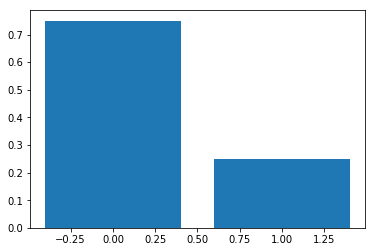

In [5]:
#conversión al tipo necesario para tensor flow
psi = tf.cast(psi, tf.complex64)
phi = tf.cast(phi,tf.complex64)
in_state = tf.tensordot(psi,phi,axes=0) 
eng, q = sf.Engine(2)
with eng:
    Ket(in_state) | q
    BSgate(np.pi/4,0) | q
#state_out = eng.run('tf', cutoff_dim=cutoff,eval=False,modes=[1])
state_out = eng.run('tf', cutoff_dim=cutoff)
#Matriz de densidad del sistema y las matrices reducidas
rho=state_out.dm()
rhoA = np.einsum('ijll->ij', rho)
rhoB = np.einsum('kkij->ij', rho)
#Grafica de p(n) para uno de los modos de salida
import matplotlib.pyplot as plt
plt.bar(np.arange(cutoff), height=np.real_if_close(np.diag(rhoA)))

In [6]:
# Gráfica en esfera de Bloch
def M(axis, theta):
    #Función que realiza una rotación en el eje axis
    return expm(np.cross(np.eye(3), axis/norm(axis)*theta))
from qutip import Bloch
b=Bloch()
vec = [[0,0,-1],[0,1,0],[0,0,1]]
b.add_vectors(vec)
npts=10;

v5, axis, theta = [0.1,0.5,0], [0,0,1],1.2
#v=v/norm(v)
v1= np.trace(rhoA@s1)
v2= np.trace(rhoA@s2)
v3= np.trace(rhoA@s3)
v = np.real_if_close([v1,v2,v3])
b.clear()
b.vector_color = ['r']
b.view = [-40,30]
#b.add_points(np.transpose(vecv))
b.add_vectors(v)


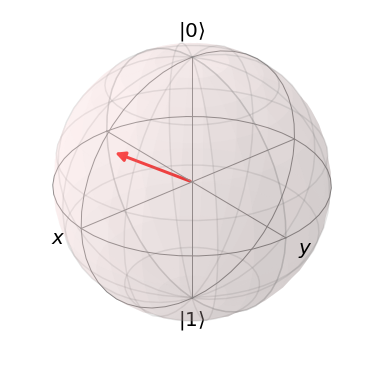

In [12]:
b.show()

### Ejercicio: 

* Escribe las transformaciones sobre estados $|0\rangle$ y $| 1\rangle$ 
* Obtén las transformaciones para una combinación lineal de estados de la forma $|\psi \rangle = \alpha |0 \rangle + \beta |1\rangle$
* Haz un programa utilizando RBF que realice la transformación de estos estados. 
* ¿Podemos construir alguna compuerta del set estudiado hasta ahora con lo que acabamos de ver de los divisores de haz?

NOTA PERSONAL: falta agregar la parametrización de los coeficientes

* Construya cualquier transformación unitaria mediante retardadores de fase y la compuerta $U_2$

<center><h2> Inteferómetro Mach-Zender <h2></center>
Un interferómetro de Mach-Zender se construye como sigue   
<img src="Images/MZ.png" alt="drawing" style="width:250px;">
    
- Es equivalente a introducir un 'retardador de fase' entre dos compuertas Hadamard (Compruebe esto). Esto se puede hacer con una compuerta de fase. Esto es equivalente a $H \phi(-\alpha) H$, donde la fase $\alpha$ es una fase relativa entre los dos caminos ópticos posibles
    
- Considere ahora que un sólo fotón entra en el interferómetro por el brazo superior ($|0\rangle$). Luego, se detecta un fotón en el brazo superior a la salida del interferómetro. Se puede demostrar que la probabilidad de obtener un fotón está dada por 
    $$p_0 = \frac{1}{2} \left( 1+ \cos \alpha\right)$$
    

<center><h2> Mediciones nulas ("No destructivas") <h2></center>
Queremos detectar detectar una bomba que es tan sensible, que con sólo absorber un fotón exlota. Es decir, que si nosotros la observamos, por el hecho de saber que está allí (haberla iluminado de alguna forma para observarla) habría provocado su explosión. ¿Habrá alguna manera de resolver este paradigma?
    
NOTA: colocar encuesta y resultados en esta sección
  
####  Una medición nula: es aquella en la que el objeto a ser medido no cambia cuando cumple con ciertas características, pero se modifica cuando cumple con otras. Considere el ejemplo en la figura, donde un electrón sólo puede ser excitado si un fotón incide con la polarización adecuada.
<center>    
<img src="Images/NM-01.png" alt="drawing" style="width:250px;">
</center>


<center><h2> Implementación en StrawBerry Fields <h2></center>
Queremos detectar bomba que se muestra en la figura
    <img src="Images/Bomba.png" alt="drawing" style="width:250px;">
    
Flujo de codificación y simulación:
* Preparar un estado inicial en $|0\rangle$.
* Hacerlo evolucionar en el BS
* Calcular la probabilidad de que el fotón se haya ido por el camino inferior, utilizando $P_1 = |\langle 1 | \psi \rangle |^2$. 
* Aplicar la medición nula, es decir, volver a preparar el estado en el modo $|0\rangle$ y hacerlo evolucionar en el BS
* Calcular las probabilidades de detección finales. 
    

   

In [7]:
# se prepararn las entradas del BS
psi = np.zeros([cutoff], dtype=np.complex128)
#psi[0] = 1.0
psi[1] = 1.0

psi /= np.linalg.norm(psi)

#entrada 2 del BS
phi = np.zeros([cutoff],dtype=np.complex128)
phi[0] = 1.0
phi /= np.linalg.norm(phi)


psi = tf.cast(psi, tf.complex64)
phi = tf.cast(phi,tf.complex64)
in_state = tf.tensordot(psi,phi,axes=0) 

eng, q = sf.Engine(2)
with eng:
    Ket(in_state) | q
    BSgate(np.pi/4,0) | q   #2 efecto del BS sobre la entrada 
#    Measure | q[1] # esta estrategia tiene la problemática de que 
state_out = eng.run('tf', cutoff_dim=cutoff)
rho1=state_out.dm()
#realizar medición
MMM= np.tensordot(np.eye(2),np.array([0,1])[np.newaxis].T@np.array([0,1])[np.newaxis],axes=0)
Prob_Bomba=np.real_if_close(np.trace(np.trace(rho1@MMM)))

# se prepara el estado nuevamente
# se hace pasar por el divisor de haz
# se hacen mediciones de n
eng, q = sf.Engine(2)
with eng:
    Ket(in_state) | q
    BSgate(np.pi/4,0) | q   #2 efecto del BS sobre la entrada 
    Measure | q[0]
    Measure | q[1] 


#sess=tf.Session()
#with sess.as_default():
    #psi_value=sess.run(psi)
#    MMM=MMM.eval()
 #   rhoB2=rhoB.eval()


0.4999999701976776

In [56]:
np.trace(np.trace(state_out.dm()@np.tensordot(np.eye(2),np.eye(2),axes=0)))

(0.9999999403953552+0j)

In [74]:
np.array([0,1])[np.newaxis].T@np.array([0,1])[np.newaxis]

array([[0, 0],
       [0, 1]])

In [69]:
a = np.array([5,4])[np.newaxis]

In [70]:
a

array([[5, 4]])

In [77]:
np.array([0,1])[np.newaxis].T@np.array([0,1])[np.newaxis]

array([[0, 0],
       [0, 1]])

In [78]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [80]:
MMM

array([[[[0., 0.],
         [0., 1.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 1.]]]])